<a href="https://colab.research.google.com/github/khayk5ay/Anomaly_Detection/blob/main/Anomaly_Detection_Algorithm_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The essence of an anomaly detection algorithm is to detect strange occurences whose probability of occurence is quite unlikely.

In [115]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import random

In [116]:
# Generate random dataset for the algorithm analysis
def generate_dataset():
  X_train_list = []
  X_val_list = []
  y_val_list = []

  # Generate the training set containing values considered to be normal
  for i in range(50):
    X_train_list.append([random.uniform(25,30), random.uniform(3,5)])

  X_train = np.array(X_train_list)

  # Generate the validation set of some normal and other anomolous values
  for i in range(20):
    X_val_list.append([random.uniform(25,30), random.uniform(3,5)])
    y_val_list.append(0)
  for i in range(5):
    X_val_list.append([random.uniform(19,27), random.uniform(2,7)])
    y_val_list.append(1)
  for i in range(5):
    X_val_list.append([random.uniform(28,35), random.uniform(2,7)])
    y_val_list.append(1)

  X_val = np.array(X_val_list)
  y_val = np.array(y_val_list)

  return X_train, X_val, y_val

In [117]:
# Initialise Training dataset for training
X_train, X_val, y_val = generate_dataset()

X_train

array([[29.98137732,  3.57908524],
       [29.0119095 ,  4.72497358],
       [28.78935905,  3.00348872],
       [29.01600749,  3.11808059],
       [29.9658352 ,  3.44217671],
       [26.92706952,  3.13340566],
       [25.81175133,  4.02503923],
       [29.83823981,  3.46328434],
       [29.30444216,  4.7226113 ],
       [26.49304489,  4.36960393],
       [27.32419529,  4.64478111],
       [25.3518946 ,  4.04114909],
       [27.63841214,  3.91773056],
       [25.59512137,  4.40751598],
       [29.51814625,  3.50247419],
       [26.44399066,  4.25044765],
       [28.50467538,  4.10949471],
       [29.33770372,  3.39190715],
       [29.34932176,  3.37398049],
       [28.94394898,  4.66192521],
       [29.81021384,  3.19868643],
       [26.36767616,  4.41569433],
       [25.53090881,  4.36848688],
       [29.85278768,  3.1659579 ],
       [25.97520333,  3.616412  ],
       [26.70171174,  4.50163068],
       [28.07294293,  4.44573253],
       [26.58369998,  4.27053393],
       [25.04636918,

(10.0, 40.0)

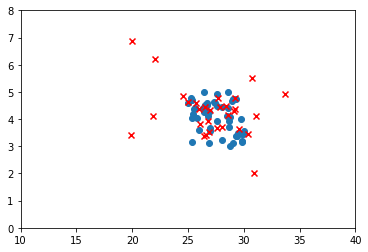

In [118]:
# Visualise the data
plt.scatter(X_train[:,0], X_train[:, 1], marker='o')
plt.scatter(X_val[:,0], X_val[:, 1], color='r', marker='x')
plt.ylim(0,8)
plt.xlim(10,40)

In [131]:
y_val

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

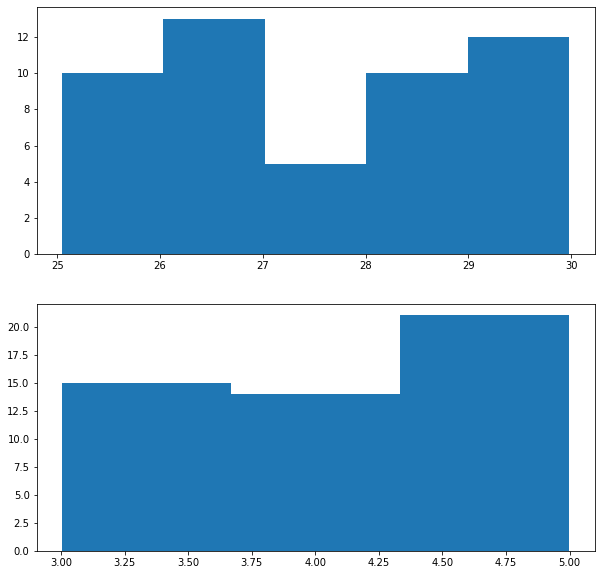

In [119]:
# Look at the distribution of each of the features in X_train

fig, ax = plt.subplots(2,1, figsize=(10,10))
 
ax[0].hist(X_train[:,0], bins=5) 
ax[1].hist(X_train[:,1], bins=3)
plt.show()

Even though the data does not necessarily have a normal / gaussian distribution, the algorithm still does well to detect any anomalies

In [120]:
# Get the values if Mean and Variance for the data set
def get_gaussian_distribution(X):
  """
  gets the gaussian distribution of the data

  parameters:
  X (numpy ndarray) : m * n dimensioned unlabeled data

  returns:
  mu () : 1 * n array showing the mean of the data
  var () : 1 * n array showing the variance of the data
  
  """
  m, n = X.shape
  # Compute the mean of each featrue in the data set
  mu = sum(X) / m
  # Compute the variance of each feature in the data set
  var = sum((X-mu)**2) / m
  
  return mu, var

In [121]:
mu, var = get_gaussian_distribution(X_train)

In [122]:
print(f"The mean is {mu}")
print(f"The variance is {var}")

The mean is [27.5878978   4.06570382]
The variance is [2.30494907 0.32347855]


$$ p(x ; \mu,\sigma ^2) = \frac{1}{\sqrt{2 \pi \sigma ^2}}\exp^{ - \frac{(x - \mu)^2}{2 \sigma ^2} }$$

In [123]:
# Get probabilities of features when provided with the array of all observations when provided witht he values of the gaussian distribution 

def get_probabilities(X, mu, var):
  # Initialise the array to hold the probabilities
  p_x_j = np.zeros(len(X))
  
  # Get probabiliities for each observation
  for j in range(len(X)):
    # Initialise the array that will hold the probabilities for each feature associated with the overall observation
    p_x_i = np.zeros(X[j].shape[0])
    for i in range(X[j].shape[0]):
      # Compute the probability of each individual feature
      denom = np.sqrt(2 * np.pi * var[i])
      exp_val = -((X[j][i]-mu[i]) ** 2 )/ (2 * var[i])
      p_x_i[i] = (1 / denom) * np.exp(exp_val)

    # Compute the overall probability of that observation as the product of all the feature probabilities
    p_x_j[j] = np.prod(p_x_i)

  return p_x_j

In [124]:
get_probabilities(X_train, mu, var)
#len(X_train[0].shape)

array([0.03688989, 0.06064043, 0.02355918, 0.0295541 , 0.02963915,
       0.0437478 , 0.09273752, 0.03506481, 0.0499227 , 0.12320859,
       0.10812153, 0.06225061, 0.17808517, 0.06501553, 0.05030437,
       0.1316378 , 0.15314345, 0.04702721, 0.04488213, 0.07140005,
       0.01975501, 0.11042479, 0.06388614, 0.01733259, 0.07674337,
       0.11588188, 0.140105  , 0.13880364, 0.02920352, 0.01734433,
       0.13924536, 0.03559328, 0.14135104, 0.10282512, 0.04046169,
       0.02763093, 0.13377119, 0.12195737, 0.16042716, 0.13804313,
       0.03392338, 0.05691536, 0.11951329, 0.15809634, 0.11854366,
       0.10381494, 0.1124973 , 0.06442629, 0.06600239, 0.0575483 ])

In [125]:
# Determine the threshold probability below which an observation will be considered abnormal
# The threshold will be considered using the F1 score
def select_threshold(y_val, p_val):

  best_F1 = 0
  best_epsilon = 0
  step_value = (p_val.max() - p_val.min()) / 1000
  # Consider a wide range of theshold values
  for epsilon in np.arange(p_val.min(), p_val.max(), step_value):
    
    predictions = p_val < epsilon
    # Compute the True Positive (tp), False Positive(fp), False Negative(fn)
    tp = sum(predictions[y_val == 1])
    fp = sum(predictions[y_val == 0])
    fn = sum(y_val[predictions == 0])

    precision_score = tp / (tp + fp)
    recall_score = tp / (tp + fn)
    
    #Compute the f1 score for each value of epsilon
    F1 = (2 * precision_score * recall_score) / (precision_score + recall_score)

    if F1 > best_F1:
      best_F1 = F1
      best_epsilon = epsilon

  return best_F1, best_epsilon    


In [126]:
get_probabilities(X_val, mu, var)

array([1.18446722e-01, 4.48480646e-02, 1.44148227e-01, 1.21782537e-01,
       1.03141503e-01, 8.68159445e-02, 9.18739884e-02, 1.55590664e-01,
       2.65567014e-02, 6.02680238e-02, 1.02551455e-01, 1.53916503e-01,
       1.48120636e-01, 8.82817271e-02, 1.42250047e-01, 1.07429233e-01,
       7.92217549e-02, 5.71060034e-02, 6.78424058e-02, 1.43880857e-01,
       1.62203848e-04, 2.07532168e-07, 3.57117147e-12, 2.84505343e-07,
       1.04779216e-02, 2.37940047e-05, 1.99298591e-02, 1.28076254e-02,
       1.82259921e-05, 9.24581518e-04])

In [127]:
F1_score, epsilon = select_threshold(y_val, get_probabilities(X_val, mu, var))
print("F1 Score ", F1_score)
print("Best Epsilon ", epsilon)

F1 Score  1.0
Best Epsilon  0.02007119569412124


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars


In [128]:
# Predict anomalous occurences based on already trained parameters
def predict(X_test, epsilon, mu, var):

  y_prob = get_probabilities(X_test, mu, var)

  y_pred = (y_prob < epsilon) + 0

  return y_pred

In [129]:
y_pred = predict(X_val, epsilon, mu, var)

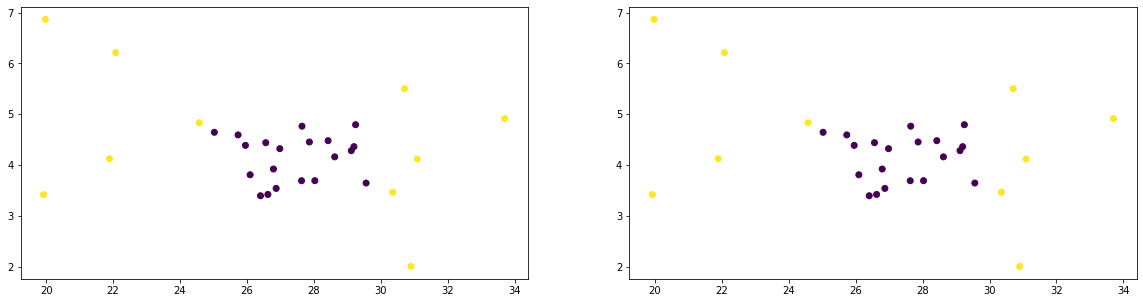

In [140]:
fig, ax = plt.subplots(1,2, figsize = (20,5))

ax[0].scatter(X_val[:,0], X_val[:,1], c=y_val)
ax[1].scatter(X_val[:,0], X_val[:,1], c=y_pred)
ax[1].set_label(y_pred)